# 순환 신경망으로 IMDB 리뷰 분류하기

## IMDB 데이터
IMDB 리뷰 데이터셋은 유명한 인터넷 영화 데이터베이스인 imdb.com에서 수집한 리뷰를 감상평에 따라 긍정과 부정으로 분류해 놓은 데이터 셋입니다.

총 50,000개의 샘플로 이루어져 있고 훈련 데이터와 테스트 데이터에 각각 25,000개씩 나누어져 있습니다.

텍스트 데이터의 경우 단어를 숫자 데이터로 바꾸는 일반적인 방법은 데이터에 등장하는 단어마다 고유한 정수를 부여하는 것입니다.

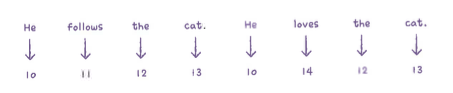

일반적으로 영어 문장은 모두 소문자로 바꾸고 구둣점을 삭제한 다음 공백을 기준으로 분리합니다.

이렇게 분리된 단어를 토큰(token)이라고 부릅니다.

하나의 샘플은 여러 개의 토큰으로 이루어져 있고 1개의 토큰이 하나의 타임스탬프에 해당합니다.

실제 IMDB 리뷰 데이터셋은 텐서플로에 이미 정수로 바꾼 데이터가 포함되어 있습니다.

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [2]:
print(train_input[0])
print(train_target[:20])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [3]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target  = train_test_split(train_input, train_target, test_size = 0.2, random_state = 42)


In [4]:
import numpy as np
lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths), np.median(lengths))


239.00925 178.0


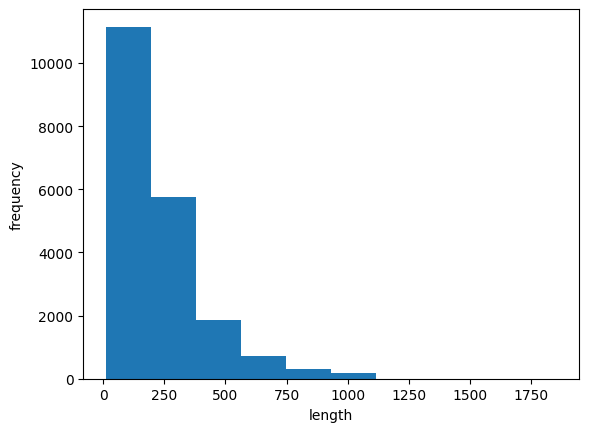

In [5]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

리뷰는 대부분 짧아서 이 예제에서는 중간값보다 훨씬 짧은 100개의 단어만 사용하겠습니다.

100개의 단어보다 작은 리뷰는 길이를 100에 맞추기 위해 패딩을 진행합니다. 

보토 패딩을 나타내는 토큰은 0을 사용합니다.

In [6]:
from keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100, truncating='pre')
#truncating='pre'일 경우 앞 부분 자름
# 뒷 부분 자르고 싶을 때 pre를 post로 변경하면 된다.


In [7]:
print(train_seq[0])
print(train_input[0][-10:])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]
[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [8]:
val_seq = pad_sequences(val_input, maxlen=100)

In [9]:
#순환 신경망 만들기
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
#500개의 단어만 사용, 원-핫 인코딩 표현하기 위해 배열의 길이가 500이어야 함
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [10]:
train_oh = keras.utils.to_categorical(train_seq)
print(train_oh.shape)

(20000, 100, 500)


In [11]:
print(np.sum(train_oh[0][0]))

1.0


In [12]:
val_oh = keras.utils.to_categorical(val_seq)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4081 (15.94 KB)
Trainable params: 4081 (15.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/20
313/313 [==============================] - 8s 23ms/step - loss: 0.6999 - accuracy: 0.5015 - val_loss: 0.6979 - val_accuracy: 0.5150
Epoch 2/20
 10/313 [..............................] - ETA: 5s - loss: 0.6940 - accuracy: 0.5078

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 6s 19ms/step - loss: 0.6946 - accuracy: 0.5125 - val_loss: 0.6946 - val_accuracy: 0.5250
Epoch 3/20
313/313 [==============================] - 6s 19ms/step - loss: 0.6914 - accuracy: 0.5239 - val_loss: 0.6924 - val_accuracy: 0.5264
Epoch 4/20
313/313 [==============================] - 6s 20ms/step - loss: 0.6890 - accuracy: 0.5355 - val_loss: 0.6908 - val_accuracy: 0.5338
Epoch 5/20
313/313 [==============================] - 6s 19ms/step - loss: 0.6866 - accuracy: 0.5468 - val_loss: 0.6886 - val_accuracy: 0.5394
Epoch 6/20
313/313 [==============================] - 6s 19ms/step - loss: 0.6809 - accuracy: 0.5772 - val_loss: 0.6796 - val_accuracy: 0.5876
Epoch 7/20
313/313 [==============================] - 6s 19ms/step - loss: 0.6681 - accuracy: 0.6223 - val_loss: 0.6668 - val_accuracy: 0.6192
Epoch 8/20
313/313 [==============================] - 6s 19ms/step - loss: 0.6561 - accuracy: 0.6460 - val_loss: 0.6569 - val_accuracy: 0.6470
Epoch 9/20

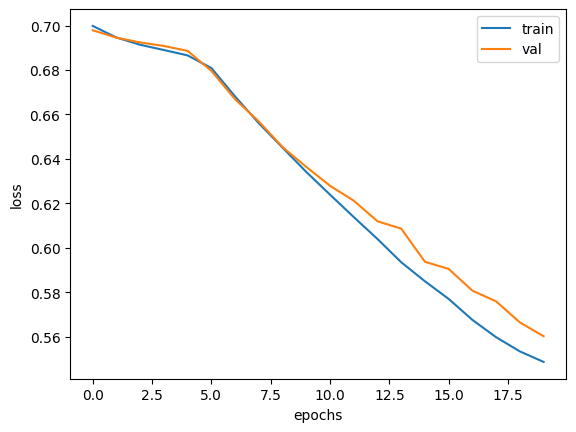

In [14]:
#순환 신경망 훈련하기
rmsprop = keras.optimizers.legacy.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=20, batch_size=64, validation_data=(val_oh, val_target), 
                    callbacks=[checkpoint_cb, early_stopping_cb])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()


In [15]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


### 원-핫 인코딩의 문제점은 입력 데이터가 커진다는 것입니다.
### 이러한 문제를 피하기 위해 단어 임베딩을 사용합니다.
단어 임베딩은 각 단어를 고정된 크기의 실수 벡터로 바꾸어 줍니다.

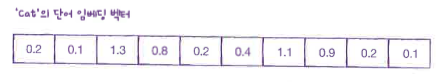

단어 임베딩으로 만들어진 벡터는 원-핫 인코딩된 벡터보다 훨씬 의미 있는 값으로 채워지기 때문에 자연어 처리에서 더 좋은 성능을 내는 경우가 많습니다.

In [16]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8209 (32.07 KB)
Trainable params: 8209 (32.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
rmsprop = keras.optimizers.legacy.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/100
313/313 [==============================] - 4s 11ms/step - loss: 0.5441 - accuracy: 0.7265 - val_loss: 0.6075 - val_accuracy: 0.6730
Epoch 2/100
 17/313 [>.............................] - ETA: 2s - loss: 0.5253 - accuracy: 0.7518

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 3s 11ms/step - loss: 0.5412 - accuracy: 0.7286 - val_loss: 0.6094 - val_accuracy: 0.6700
Epoch 3/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5385 - accuracy: 0.7296 - val_loss: 0.6057 - val_accuracy: 0.6790
Epoch 4/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5358 - accuracy: 0.7315 - val_loss: 0.6058 - val_accuracy: 0.6740
Epoch 5/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5332 - accuracy: 0.7361 - val_loss: 0.6059 - val_accuracy: 0.6780
Epoch 6/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5310 - accuracy: 0.7348 - val_loss: 0.6060 - val_accuracy: 0.6786


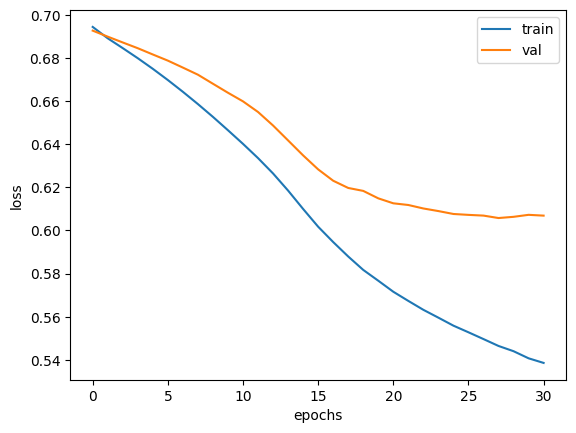

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()